<a href="https://colab.research.google.com/github/Aikhusy/PCVK/blob/master/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team 02 TI-3H**

<table>
  <tr>
    <th>Absen</th>
    <th>Nama</th>
    <th>NIM</th>
  </tr>

  <tr>
    <td>03</td>
    <td>Adinda Wahyu Luchmansyahvira</td>
    <td>2141720096</td>
  </tr>
    <tr>
    <td>04</td>
    <td>Alfan Olivan</td>
    <td>2141720078</td>
  </tr>
    <tr>
    <td>15</td>
    <td>Lukas Valentino</td>
    <td>2141720032</td>
  </tr>
    <tr>
    <td>17</td>
    <td>Mochamad Driya Ananta</td>
    <td>2141720224</td>
  </tr>
    <tr>
    <td>28</td>
    <td>Wiradarma Nurmagika Bagaskara</td>
    <td>2141720184</td>
  </tr>
  
  
</table>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
cnb='/content/drive/MyDrive/PCVK-2023/Object Detection/cats_and_bunnies.jpg'

ct='/content/drive/MyDrive/PCVK-2023/Object Detection/cat2_templatejpg.jpg'

In [ ]:
ktp='/content/drive/MyDrive/PCVK-2023/KTP_More/ktp.png'


In [ ]:
ktp_image=cv2.imread(ktp)

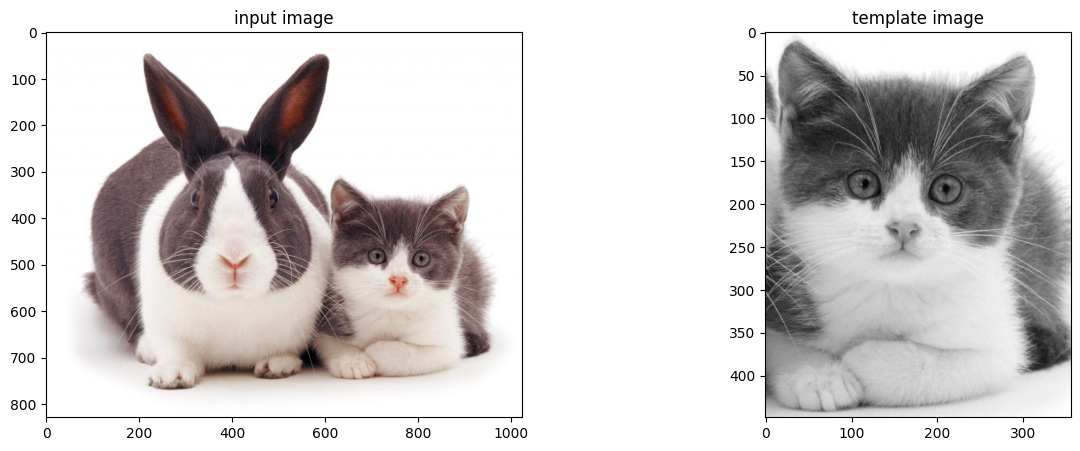

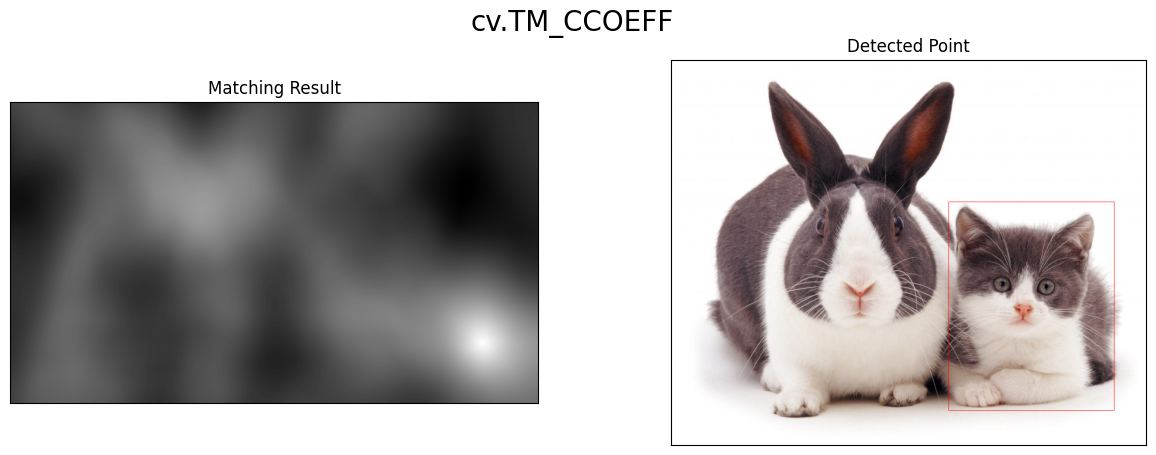

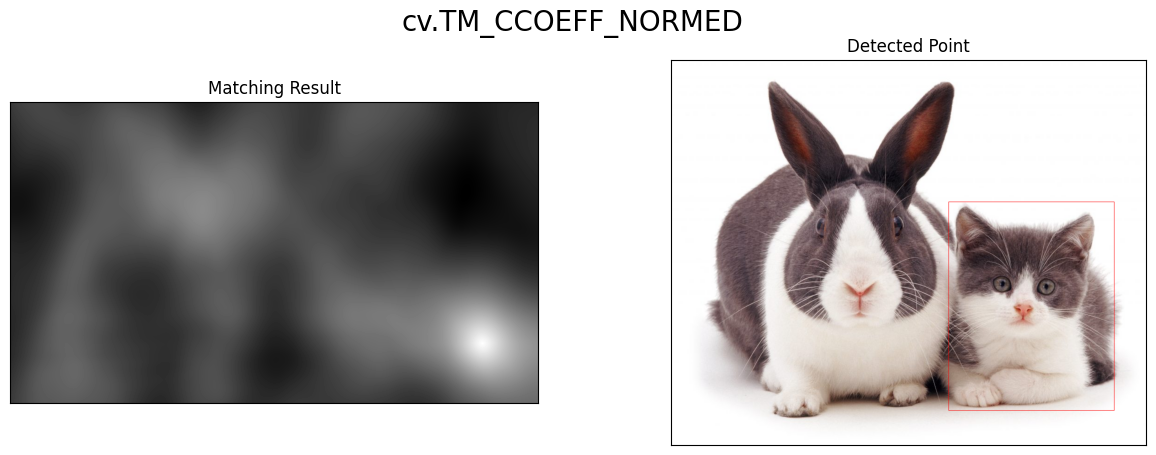

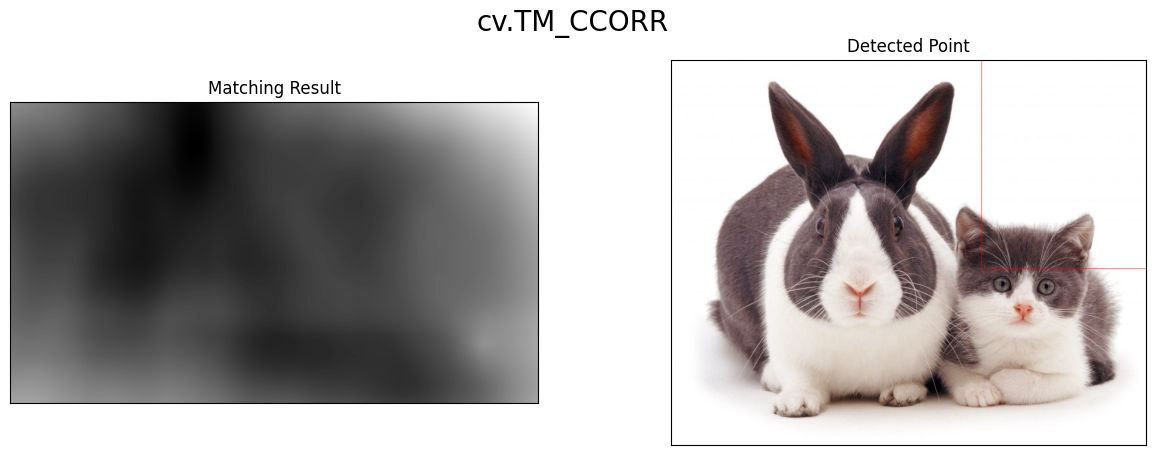

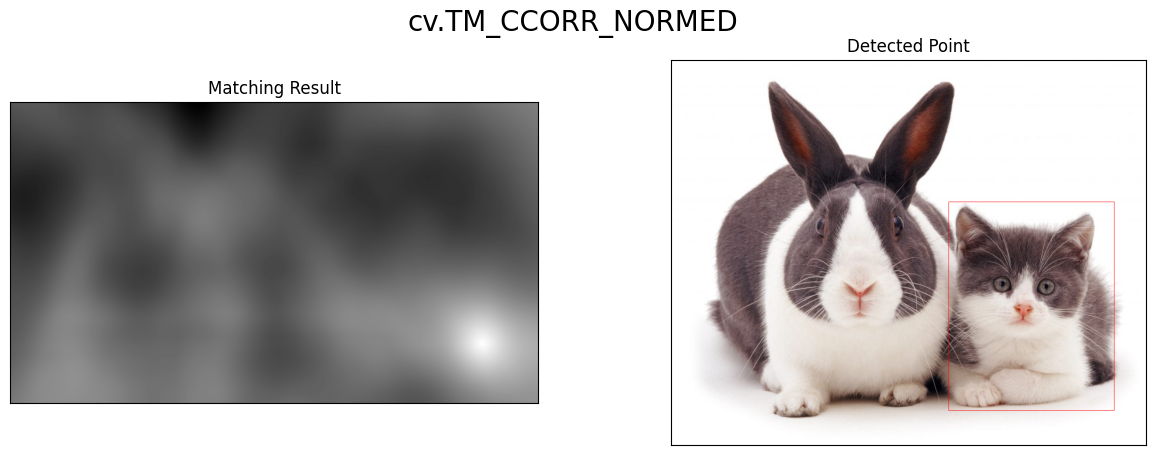

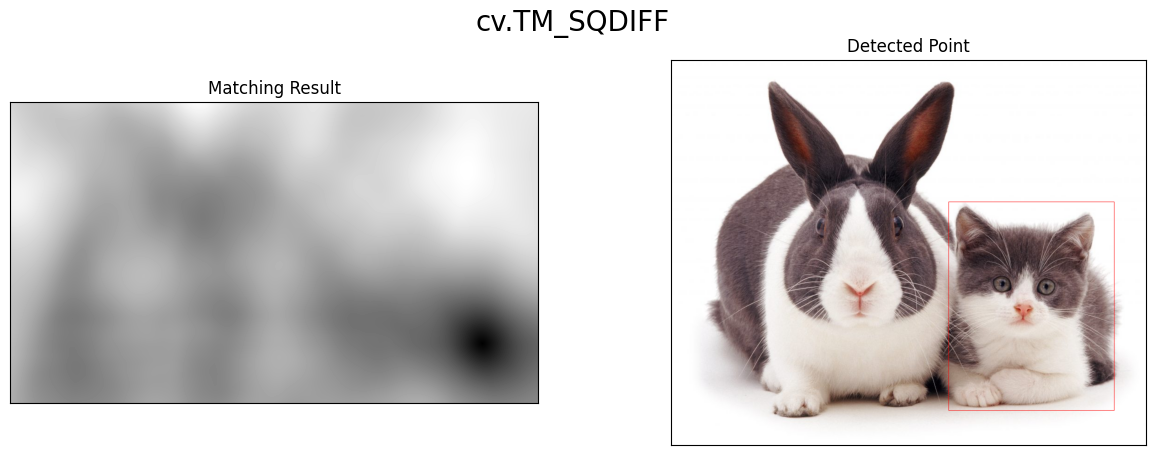

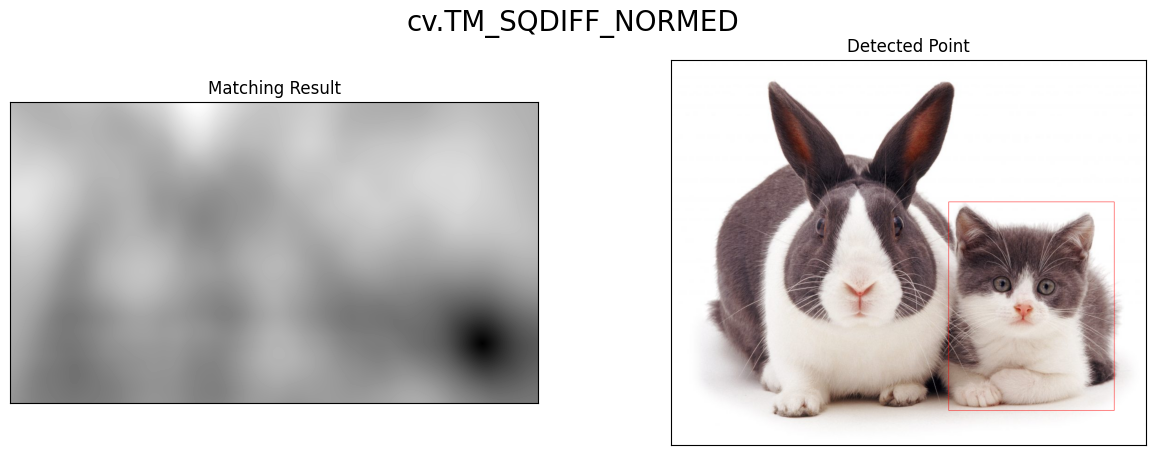

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK-2023/Object Detection/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK-2023/Object Detection/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255))
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

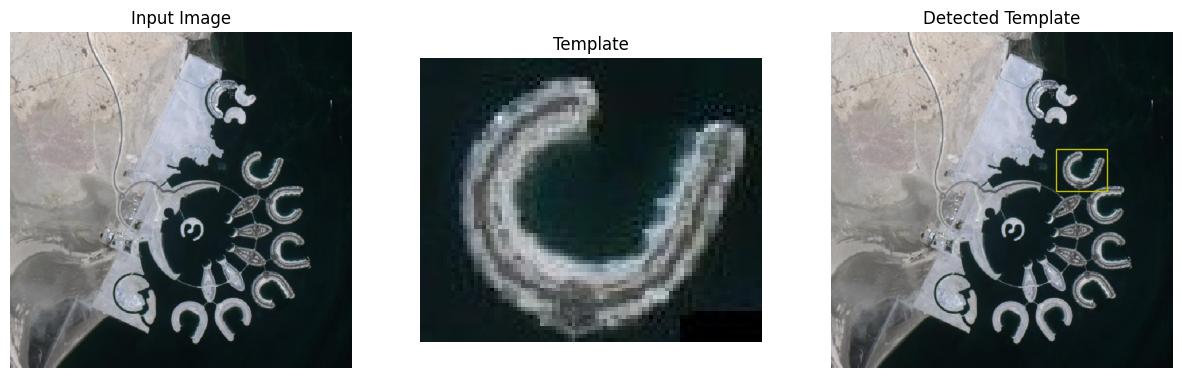

In [ ]:

from PIL import Image

def normalize(arr):
    return (arr - arr.mean()) / (arr.std() * len(arr))

# Load images
img = Image.open('/content/drive/MyDrive/PCVK-2023/Object Detection/bahrain.jpg')
template = Image.open('/content/drive/MyDrive/PCVK-2023/Object Detection/bahrain-template.jpg')

# Convert images to grayscale
img_gray = img.convert('L')
template_gray = template.convert('L')

# Convert images to NumPy arrays
img_array = np.array(img_gray)
template_array = np.array(template_gray)

# Normalize the arrays
img_norm = normalize(img_array)
template_norm = normalize(template_array)

# Perform cross-correlation
correlation = np.zeros((img_array.shape[0] - template_array.shape[0], img_array.shape[1] - template_array.shape[1]))

for y in range(correlation.shape[0]):
    for x in range(correlation.shape[1]):
        roi = img_norm[y:y + template_array.shape[0], x:x + template_array.shape[1]]
        correlation[y, x] = np.sum(roi * template_norm)

# Find the location of the maximum correlation
y, x = np.unravel_index(np.argmax(correlation), correlation.shape)

# Display the result
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img)
ax[0].set_title('Input Image')
ax[0].axis('off')

ax[1].imshow(template)
ax[1].set_title('Template')
ax[1].axis('off')

ax[2].imshow(img)
rect = plt.Rectangle((x, y), template_array.shape[1], template_array.shape[0], edgecolor='y', facecolor='none')
ax[2].add_patch(rect)
ax[2].set_title('Detected Template')
ax[2].axis('off')

plt.show()

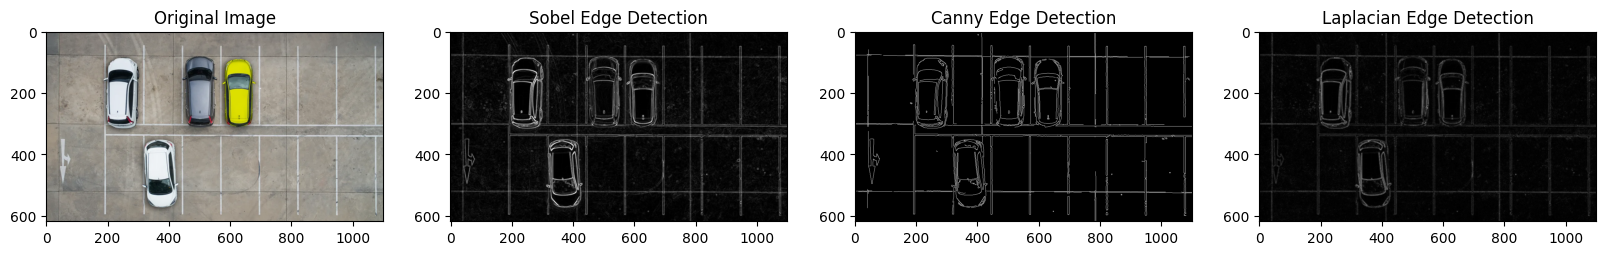

In [ ]:
img0 = cv.imread('/content/drive/MyDrive/PCVK-2023/Object Detection/car-park.jpg')
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(gray, (3, 3), 0)

img_sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

edges_canny = cv.Canny(img, 100, 200)

img_laplacian = cv.Laplacian(img, cv.CV_64F)
img_laplacian = cv.convertScaleAbs(img_laplacian)

f, axarr = plt.subplots(1, 4, figsize=(20, 5))

axarr[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')

axarr[1].imshow(img_sobelxy, cmap='gray')
axarr[1].set_title('Sobel Edge Detection')

axarr[2].imshow(edges_canny, cmap='gray')
axarr[2].set_title('Canny Edge Detection')

axarr[3].imshow(img_laplacian, cmap='gray')
axarr[3].set_title('Laplacian Edge Detection')

plt.show()

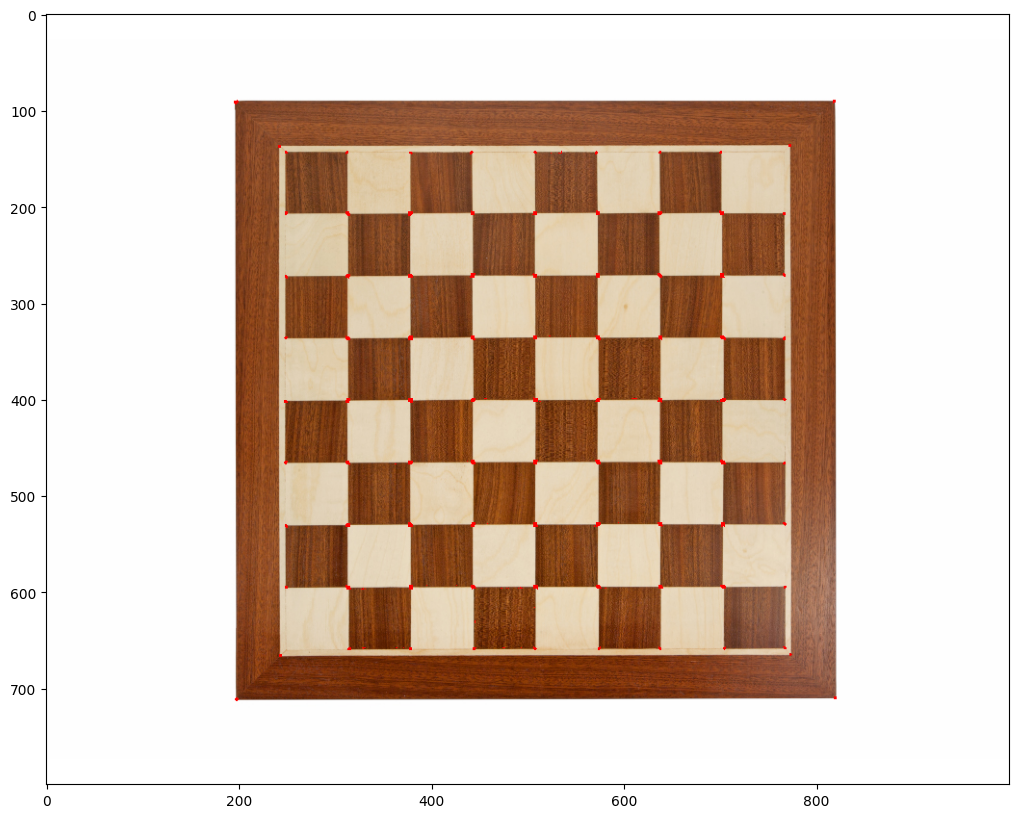

In [ ]:
#Harris Corner Detection

#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK-2023/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

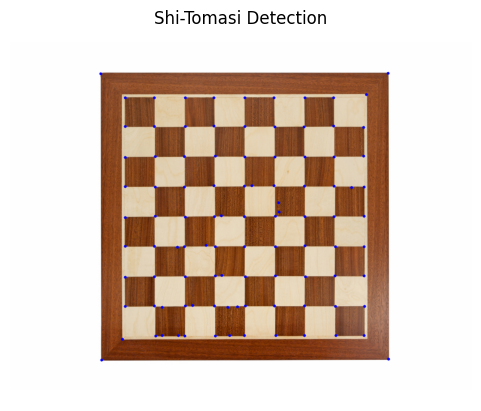

In [ ]:
#shi - thomasi

# Baca gambar chess-board.jpg
img = cv.imread('/content/drive/MyDrive/PCVK-2023/Object Detection/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Metode Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)

# Konversi koordinat titik sudut ke bilangan bulat
corners = np.int0(corners)

# Gambar lingkaran pada setiap sudut yang ditemukan
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

# Tampilkan hasil Shi-Tomasi Detection
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Detection')
plt.axis('off')
plt.show()

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


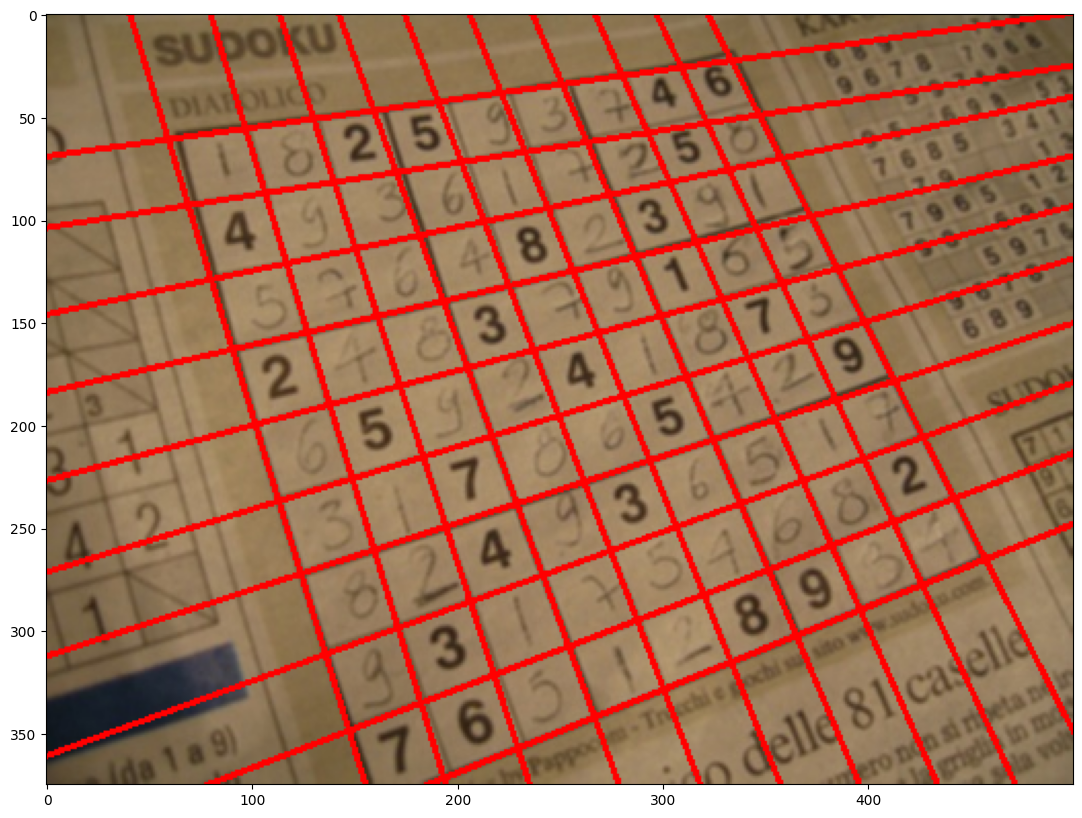

In [ ]:
input_img = cv.imread('/content/drive/MyDrive/PCVK-2023/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

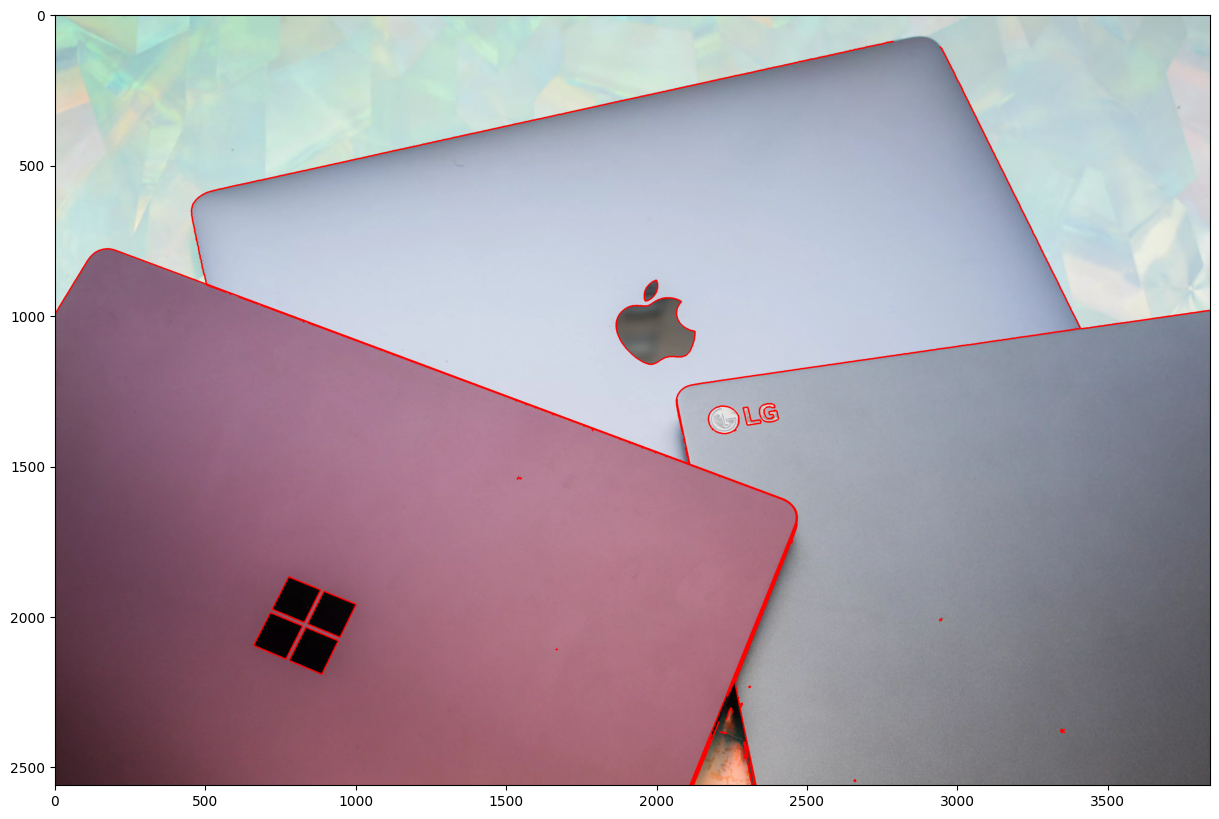

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK-2023/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [ ]:
KTPTEMPLATE='/content/drive/MyDrive/PCVK-2023/KTP_More/ktp3.png'

KTP='/content/drive/MyDrive/PCVK-2023/KTP_More/ktp3.png'

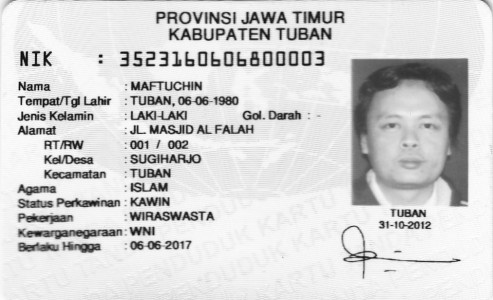

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

templateKTP = cv2.imread(KTPTEMPLATE, 0)
cv2_imshow(templateKTP)

ktpImage = cv2.imread(KTP)


In [ ]:
blurred = ktpImage.copy()
gray = blurred.copy()

blurred = cv2.GaussianBlur(ktpImage, (5, 5), 0.5)

168.0 (300, 493)


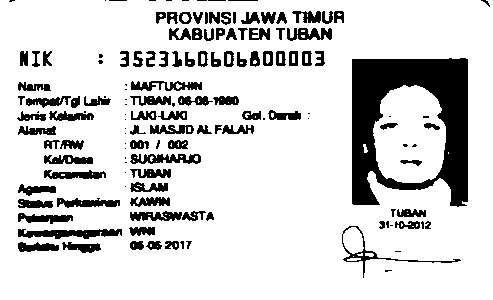

In [ ]:
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)
print(ret, bw.shape)
cv2_imshow(bw)

In [ ]:
erode = cv2.erode(bw.copy(),
cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

In [ ]:
contours, hierarchy = cv2.findContours(erode.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
ras = format(w / h, '.2f')
if h >= 40 and w >= 10 and float(ras) <= 1:
  cv2.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 255,0), thickness=1)
  print("+ x={}, y={}, w={}, h={}, rasio={}".format(x,y, w, h, ras))

In [ ]:
cv2_imshow(hierarchy)

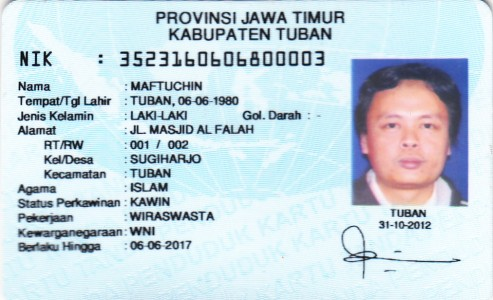

In [ ]:
cv2_imshow(ktpImage)

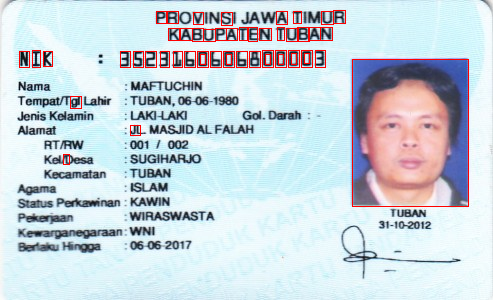

In [ ]:
import cv2

# Baca gambar KTP
ktpImage = cv2.imread('/content/drive/MyDrive/PCVK-2023/KTP_More/ktp3.png')

# Ubah gambar menjadi skala abu-abu untuk deteksi tepi
gray = cv2.cvtColor(ktpImage, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # (5, 5) adalah ukuran kernel Gaussian, dan 0 adalah deviation

# Thresholding untuk membuat gambar biner
ret, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Deteksi tepi menggunakan Canny


# Temukan kontur pada gambar tepi
contours,  hierarchy= cv2.findContours(thresholded, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada gambar asli
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktpImage, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan gambar dengan kontur
cv2_imshow(ktpImage)


F. Tugas Praktikum Kelompok 2 - KTP Galang Raka Bengkulu


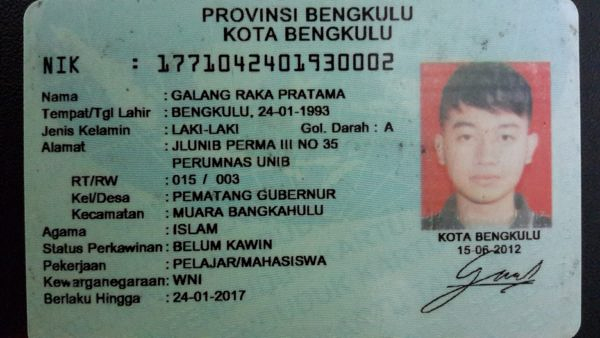

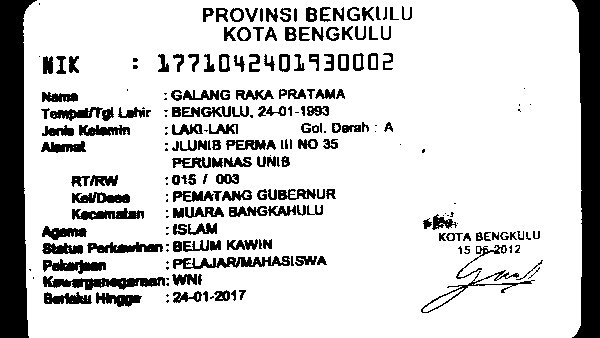

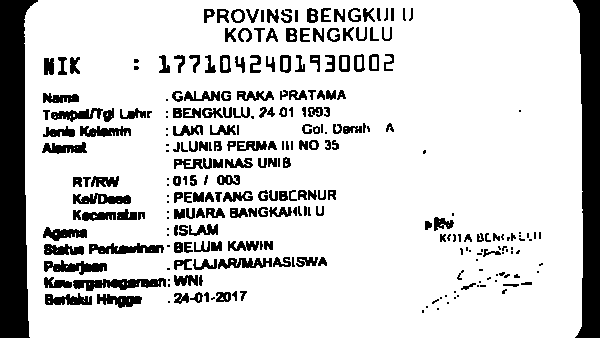

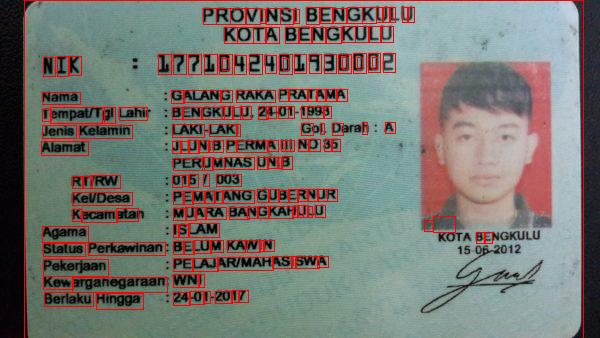

In [ ]:
import numpy as np
from skimage import morphology

ktp = cv.imread('/content/drive/MyDrive/PCVK-2023/KTP_More/ktp1.png')

blurred = cv.GaussianBlur(ktp, (21,21), 0.5)

sharpened2 = cv.addWeighted(ktp, 1.5, blurred,-0.5,0)
cv2_imshow(sharpened2)

gray2 = cv.cvtColor(sharpened2, cv.COLOR_BGR2GRAY)


ret2, bw2 = cv.threshold(gray2, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# print(ret, bw.shape)

cv2_imshow(bw2)

kernel = np.ones((2,2),np.uint8)

morphology = cv.morphologyEx(bw2, cv.MORPH_CLOSE, kernel)

cv2_imshow(morphology)


contours2, _ = cv.findContours(morphology, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for contour in contours2:
  x, y, w, h = cv.boundingRect(contour)
  if(w>3 and h>10):
    result2 = cv.rectangle(ktp, (x, y), (x+w, y+h),(0,0,255),1)

cv2_imshow(result2)